参数

In [2]:
# 函数输出打分
output_score = list(range(12))
output_score

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
# 正确分类
y = [0,0,0,0,1,0,1,1,0,1,1,1]
len(y)

12

In [4]:
# 设定p，集合中正例比例，这里范围0-100，所以还要除以100
p = list(range(0,101,10))
p = [i/100 for i in p]
p

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [16]:
# 设定代价
c01 = 3
c02 = 2

In [7]:
# 判断阈值
theta = 6.5

In [8]:
def calculate_output_result(output_score,theta):
    output_result = []
    for i in range(len(output_score)):
        if output_score[i] < theta:
            output_result.append(0)
        else:
            output_result.append(1)
    return output_result
output_result = calculate_output_result(output_score,theta)
output_result

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [10]:
# 统计正例和反例的个数
import pandas as pd
def calculate_m_positive_negative(y):
    result = pd.value_counts(y)
    m_positive = result[1]
    m_negative = result[0]
    return m_positive,m_negative
m_positive,m_negative = calculate_m_positive_negative(y)
print(m_positive,m_negative)

6 6


In [12]:
# 计算混淆矩阵的圈1、圈2、圈3、圈4
def calculate_confusion(y,output_result):
    con1 = 0
    con2 = 0
    con3 = 0
    con4 = 0
    for i in range(len(y)):
        if y[i]==1:
            if y[i] == output_result[i]:
                con1 += 1
            else:
                con2 += 1
        else:
            if y[i] == output_result[i]:
                con4 += 1
            else:
                con3 += 1
    return con1,con2,con3,con4
con1,con2,con3,con4 = calculate_confusion(y,output_result)
print(con1,con2,con3,con4)

4 2 1 5


In [13]:
# 求几个比例，保留4位小数
def calculate_FNR_FPR(con1,con2,con3,con4):
    FNR = round(con2/(con1+con2),4)
    FPR = round(con3/(con3+con4),4)
    return FNR,FPR
FNR,FPR = calculate_FNR_FPR(con1,con2,con3,con4)
print(FNR,FPR)

0.3333 0.1667


In [17]:
# 正概率代价
def calculate_Pcost(p,c01,c02):
    Pcosts = []
    for i in range(len(p)):
        Pcost = round((p[i]*c01)/(p[i]*c01+(1-p[i])*c02),4)
        Pcosts.append(Pcost)
    return Pcosts
Pcosts = calculate_Pcost(p,c01,c02)
Pcosts

[0.0, 0.1429, 0.2727, 0.3913, 0.5, 0.6, 0.6923, 0.7778, 0.8571, 0.931, 1.0]

In [20]:
# 归一化总概率
def calculate_cost_norm(p,c01,c02,FNR,FPR):
    costs_norm = []
    for i in range(len(p)):
        cost_norm = round((FNR*(p[i]*c01)+FPR*(1-p[i])*c02)/(p[i]*c01+(1-p[i])*c02),4)
        costs_norm.append(cost_norm)
        return costs_norm
costs_norm = calculate_cost_norm(p,c01,c02,FNR,FPR)
costs_norm

[0.1667]

ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

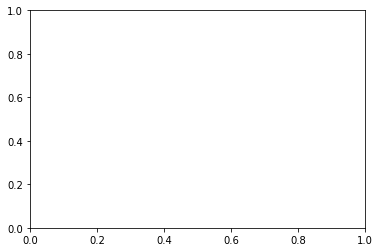

In [25]:
# 画出图像
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_lines(X,Y,color):
    plt.plot(X,Y,color)
    return
plot_lines(Pcosts,costs_norm,'r')
plot_lines(p,costs_norm,"b:")
plt.show()